In [34]:
import numpy as np
import pandas as pd
#import aplpy

from scipy.optimize import curve_fit

import astropy.io.fits as fits
from astropy.visualization import simple_norm
from astropy.visualization import SqrtStretch
from astropy.stats import sigma_clip, sigma_clipped_stats, mad_std

#from astropy.visualization.mpl_normalize import ImageNormalize

import matplotlib.pyplot as plt
#from matplotlib.colors import LogNorm
#from matplotlib.patches import Rectangle

#import ccdproc
#from ccdproc import CCDData, Combiner
#from ccdproc import median_filter


from photutils.aperture import CircularAperture, CircularAnnulus
from photutils.detection import DAOStarFinder

In [4]:
hdu0 = fits.open('./ztf_20180420451319_000439_zr_c12_o_q4_sciimg_ra303.1674_dec-2.1442_asec1200.fits.gz')
#peaks of each pixels
data = hdu0[0].data
mean, median, std = sigma_clipped_stats(data, sigma=3.0)  
print((mean, median, std))  

(218.71135, 218.43492, 7.3309455)


In [25]:
sources[:3]

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,552.99113,0.46460242,0.77615178,-0.40091172,-0.9089475,25,0,534.7063,9.4099349,-2.4339666
2,773.58892,0.92534444,0.39080588,-0.53805542,-0.61140687,25,0,162.64427,3.5640726,-1.3798664
3,756.30544,3.8037913,0.5078955,-0.39397575,-0.1075285,25,0,520.08655,9.1230736,-2.4003529


In [9]:
daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)  
sources = daofind(data - median)  
for col in sources.colnames:  
    sources[col].info.format = '%.8g'  # for consistent table output
print(sources)

 id  xcentroid ycentroid  sharpness  ... sky    peak      flux       mag     
---- --------- ---------- ---------- ... --- --------- --------- ------------
   1 552.99113 0.46460242 0.77615178 ...   0  534.7063 9.4099349   -2.4339666
   2 773.58892 0.92534444 0.39080588 ...   0 162.64427 3.5640726   -1.3798664
   3 756.30544  3.8037913  0.5078955 ...   0 520.08655 9.1230736   -2.4003529
   4 283.82344  4.4731344 0.56140136 ...   0 62.921371 1.0534184 -0.056502246
   5 33.563179  6.2149562   0.386697 ...   0 102.20503 1.6744559  -0.55968431
   6 407.00146   5.478582 0.43487901 ...   0  183.3499 3.0373222   -1.2062271
   7 463.87585  6.2047488 0.43167967 ...   0 102.61409 1.9270455  -0.71222994
   8 496.22669  6.4998422 0.46810902 ...   0 84.545242 1.2336571  -0.22798615
   9 1048.1504  7.3283296 0.39538598 ...   0 66.206589 1.1399151  -0.14218126
  10 254.32277  8.4503947 0.46751212 ...   0 1159.8516 19.708389   -3.2366278
 ...       ...        ...        ... ... ...       ...       ...

add 2D gaussian fit   
check this link???   
https://stackoverflow.com/questions/21566379/fitting-a-2d-gaussian-function-using-scipy-optimize-curve-fit-valueerror-and-m

 ...]

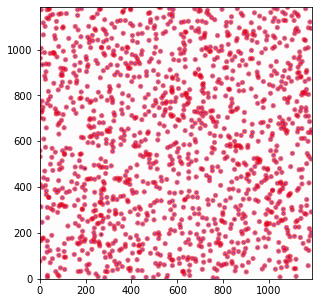

In [8]:
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=4.)
annulus_aperture = CircularAnnulus(positions, r_in=6, r_out=8)
norm = ImageNormalize(stretch=SqrtStretch())
plt.figure(figsize=(5,5))
plt.imshow(data, cmap='Greys', origin='lower', norm=norm,
           interpolation='nearest')
apertures.plot(color='blue', lw=1.5, alpha=0.5)
annulus_aperture.plot(color='red', lw=1.5, alpha=0.5)

(500.0, 700.0)

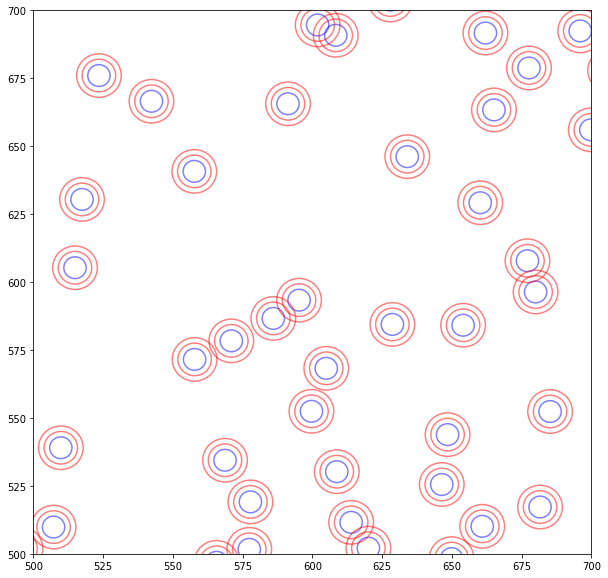

In [9]:
plt.figure(figsize=(10,10))
apertures.plot(color='blue', lw=1.5, alpha=0.5)
annulus_aperture.plot(color='red', lw=1.5, alpha=0.5)
plt.xlim(500,700)
plt.ylim(500,700)

In [ ]:
apertures = CircularAperture(positions, r=10.)
norm = simple_norm(data, 'sqrt', percent=99.9)
plt.figure(figsize=(5,5))
plt.imshow(data, cmap='Greys_r', origin='lower', norm=norm)
apertures.plot(color='#0547f9', lw=1.5)
plt.xlim(0, data.shape[1]-1)
plt.ylim(0, data.shape[0]-1)

In [ ]:
do photometry
make dataframe
find target 
catalog matching